In [ ]:
!pip install scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 데이터 준비
import numpy as np
import pandas as pd
data_df=pd.read_csv('/content/drive/MyDrive/data/auto-mpg.csv')

In [ ]:
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data_df=data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)

In [ ]:
data_df.head()
data_df.shape
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [ ]:
## 데이터 분석
# 분석모델 구축
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
lr=LinearRegression()
lr.fit(X_train.values, Y_train)
Y_predict=lr.predict(X_test.values)

In [ ]:
mse=mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2=r2_score(Y_test, Y_predict)
print('MSE: {0:.3f}, RMSE: {1:.3f}, R2: {2:.3f}'.format(mse, rmse, r2))
print('R^2(Variance Score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE: 12.278, RMSE: 3.504, R2: 0.808
R^2(Variance Score) : 0.808


In [ ]:
print('Y절편값:', np.round(lr.intercept_, 2))
print('회귀 계수값:', np.round(lr.coef_, 2))

Y절편값: -17.55
회귀 계수값: [-0.14  0.01 -0.01  0.2   0.76]


In [ ]:
coef=pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

,0
model_year,0.76
acceleration,0.20
displacement,0.01
weight,-0.01
cylinders,-0.14


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

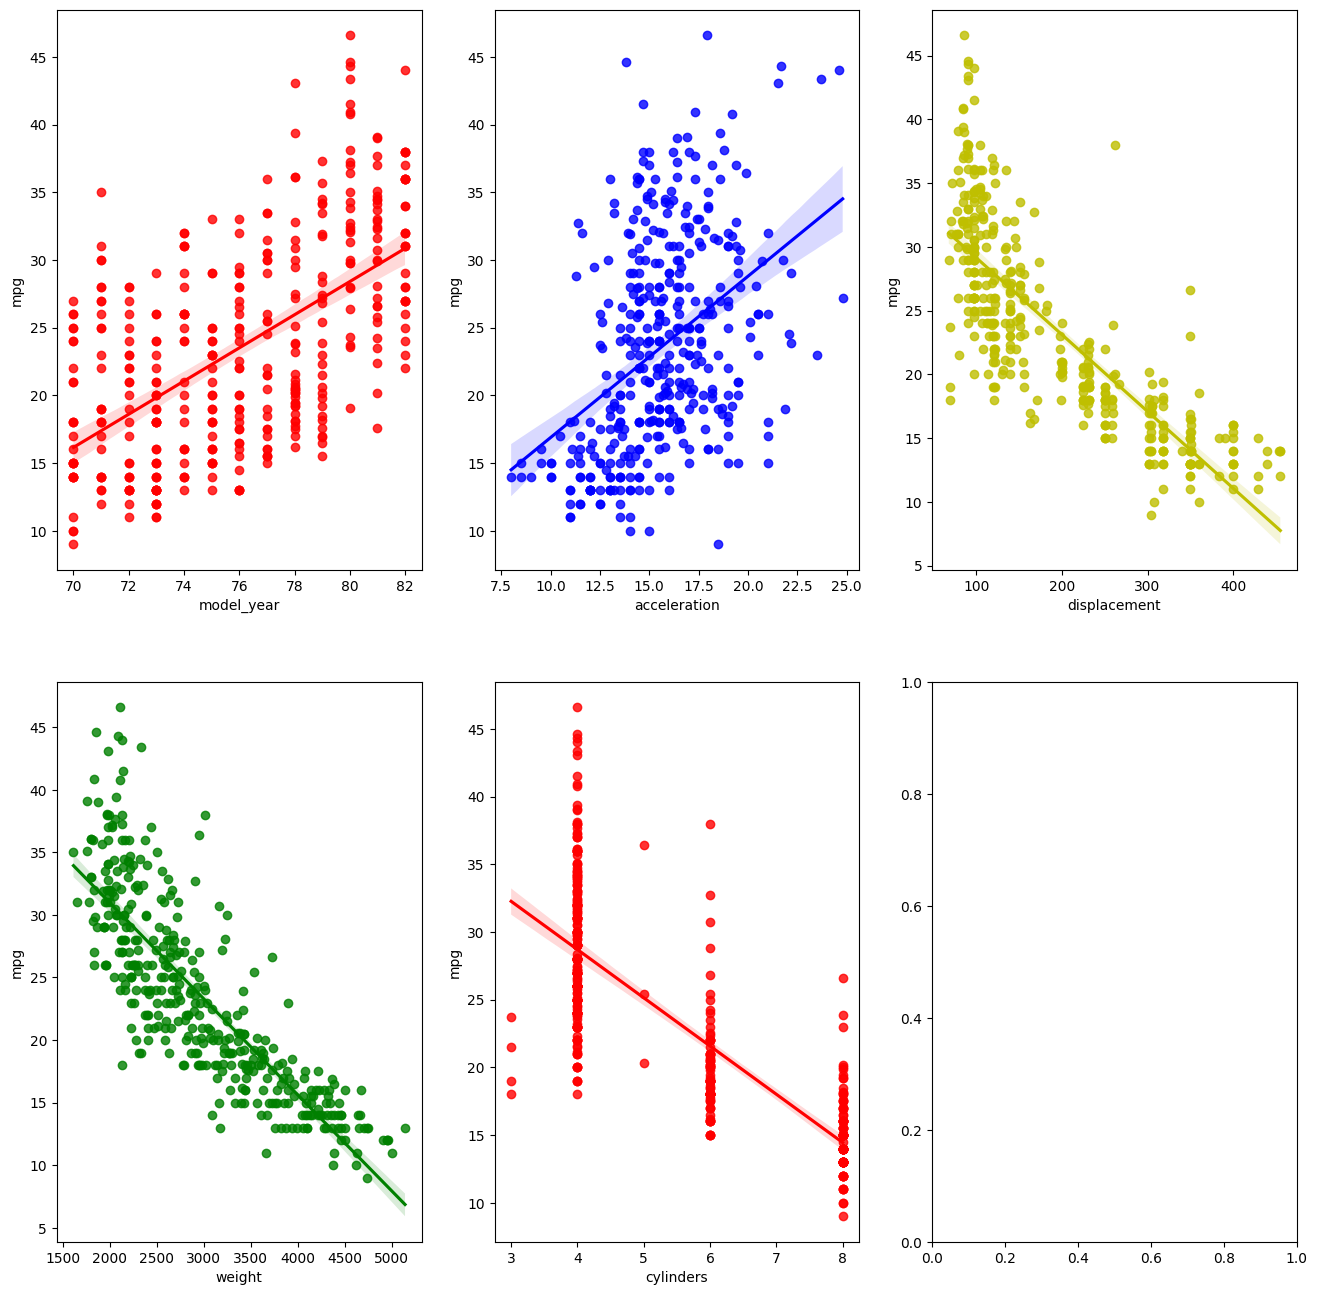

In [ ]:
fig,axs=plt.subplots(figsize=(16,16), ncols=3, nrows=2)
x_features=['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color=['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
  row=int(i/3)
  col=int(i%3)
  sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

In [ ]:
print("연비를 예측하고 싶은 차의 정보를 입력해 주세요!")

cylinders=int(input("cylindrs: "))
displacement = int(input("displacement:"))
weight = int(input("weight: "))
acceleration=int(input("acceleration: "))
model_year=int(input("model_year: "))

연비를 예측하고 싶은 차의 정보를 입력해 주세요!
cylindrs: 6
displacement:350
weight: 3000
acceleration: 15
model_year: 80


In [ ]:
mpg_predict = lr.predict([[cylinders, displacement, weight, acceleration, model_year]])

In [ ]:
print("이 자동차의 예상 연비(MPG)는 %.2f입니다!" %mpg_predict)

이 자동차의 예상 연비(MPG)는 27.19입니다!


/tmp/ipython-input-1010846528.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("이 자동차의 예상 연비(MPG)는 %.2f입니다!" %mpg_predict)
